In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np
import cv2
from PIL import Image

In [2]:
import tensorflow as tf
from tensorflow.python.keras import backend as K


config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 } )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [3]:
alphabet = ('heart','oblong','oval','round','square')
dictionary = {}
for i in range(5):
    dictionary[i] = alphabet[i]
dictionary

{0: 'heart', 1: 'oblong', 2: 'oval', 3: 'round', 4: 'square'}

In [4]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path,target_size=(224,224))
    return image

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [6]:
def predict_shape(file_path):
    #show_image(file_path)
    #image = load_and_scale_image(file_path)
    #image = image_utils.img_to_array(image)
    image = image_utils.img_to_array(file_path)
    image = image.reshape(1,224,224,3) 
    #image = image/255
    prediction = x.predict(image)
    proba=x.predict_on_batch(image)
    # convert prediction to letter
    predicted_shape = dictionary[np.argmax(prediction)]
    return predicted_shape,proba[0][np.argmax(prediction)]*100

In [38]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)

holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) 

In [13]:
x = keras.models.load_model('face shape best') # load model best

In [39]:

cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    
    ret, frame = cap.read()
    image = cv2.resize(frame,(224,224),3)
    image2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_class,proba = predict_shape(image)
    #print(face_class, face_prob)
    print(face_class,round(proba,1))
    gray_img=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #detect
    results = holistic.process(image2)
    image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
    # print(results.face_landmarks)
    # fce_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image2, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                )
    #draw
    
            
    # Display Class
    cv2.putText(image2, 'CLASS'
                , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
    cv2.putText(image2, face_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    # Display Probability
    cv2.putText(image2, 'PROB'
                , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
    cv2.putText(image2, str(round(proba,1))
                   , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    
    #image = cv2.resize(image,(860,640),3)
    cv2.imshow('face shape ',  image2)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

heart 98.7
heart 99.0
heart 99.0
heart 99.2
heart 99.8
heart 99.9
heart 99.9
heart 99.7
heart 99.6
heart 100.0
heart 100.0
heart 99.4
heart 85.0
oblong 49.4
oblong 51.4
oblong 67.8
oval 49.4
heart 42.4
oval 62.0
heart 71.5
heart 83.3
heart 92.8
heart 88.6
heart 73.4
heart 63.8
oval 90.7
oval 95.7
oval 96.9
oval 78.0
oval 55.8
oval 54.7
oval 54.2
heart 98.3
heart 90.6
heart 93.7
heart 96.3
heart 97.6
heart 98.7
heart 99.4
heart 99.2
heart 99.6
heart 99.7
heart 99.9
heart 99.7
heart 99.9
heart 99.8
heart 100.0
heart 100.0
heart 98.1
heart 98.8
heart 97.6
heart 97.1
heart 97.6
heart 96.8
heart 93.6
heart 94.6
heart 96.0
heart 96.9
heart 97.4
heart 95.8
heart 87.7
heart 89.2
heart 91.3
heart 96.1
heart 95.1
heart 71.4
oblong 50.5
oblong 68.0
oblong 42.9
heart 100.0
heart 99.9
heart 99.8
heart 99.6
heart 98.9
heart 99.2
heart 97.5
heart 98.8
heart 96.3
heart 57.1
oval 76.1
oval 83.9
heart 97.8
heart 100.0
heart 99.0
oblong 91.5
oblong 89.1
oblong 51.1
oblong 65.0
heart 97.3
heart 99.1
heart

In [24]:
# predict on image

In [33]:
def predict_shape_image(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3) 
    #image = image/255
    proba=x.predict_on_batch(image)
    prediction = x.predict(image)
    # convert prediction to letter
    predicted_shape = dictionary[np.argmax(prediction)]
    #return predicted_shape,proba[0][np.argmax(prediction)]*100
    return predicted_shape

oval


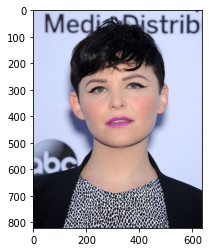

In [34]:
print(predict_shape_image("round (89).jpg"))